# Визуализация данных

###  График( вида pie), 
**построенный с помощью чистого 
matplotlib / pylab**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

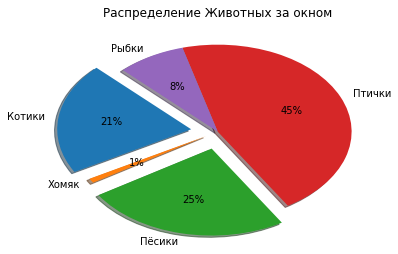

In [2]:
labels = 'Котики', 'Хомяк','Пёсики', 'Птички', 'Рыбки'
fig, ax = plt.subplots()
ax.pie([25, 1 ,30, 55, 10], (0.2, 0.1, 0.2, 0, 0), 
       labels=labels, autopct='%1.0f%%',shadow=True, startangle=135)
plt.title(u'Распределение Животных за окном')
plt.show()

### Построение pairplot с помощью seaborn на наборе данных, 
### с применением анализа взаимосвязи числовых показателей

https://www.kaggle.com/becksddf/churn-in-telecoms-dataset
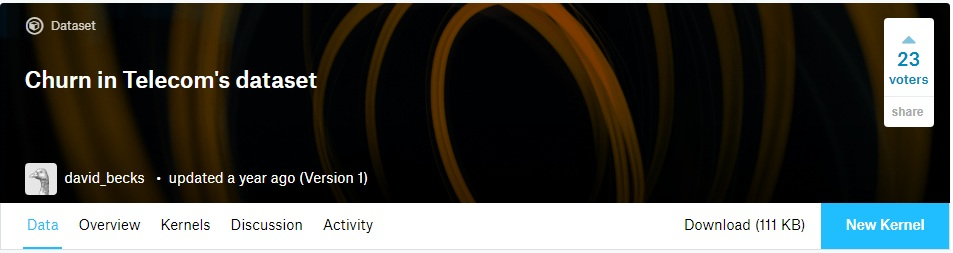

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/urwinday/7a0d7a1a0e24da017965fbd3812bb443/raw/7687d3d9a78dc74e1d4f9d702433f255cdd51744/telecom%2520churn')

In [4]:
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...    total eve calls  total eve charge  \
0             45.07  ...                 99             16.78   
1             27.47  ...                103             16.62   
2             41.38  ...                110             10.30   
3             50.90  ...                 88              5.26   
4             28.34  ...                122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [5]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### Анализ начислений по периодам за день

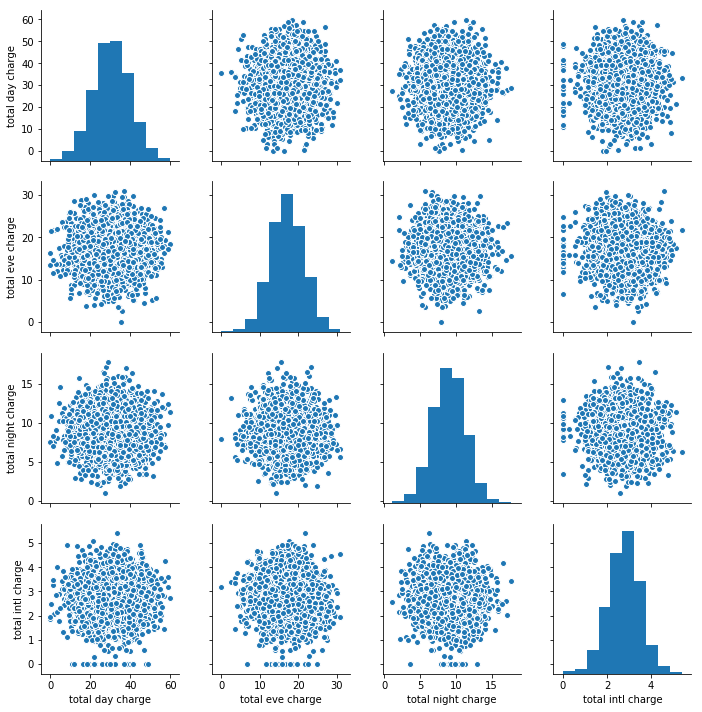

In [6]:
charge = ['total day charge','total eve charge','total night charge','total intl charge']
sns.pairplot(df[charge]);

In [7]:
new_charge = ['total day charge',
              'total eve charge',
              'total night charge',
              'total intl charge', 'churn']

In [8]:
new_df=df[new_charge]
type(new_df)

pandas.core.frame.DataFrame

In [9]:
import warnings
warnings.filterwarnings("ignore")

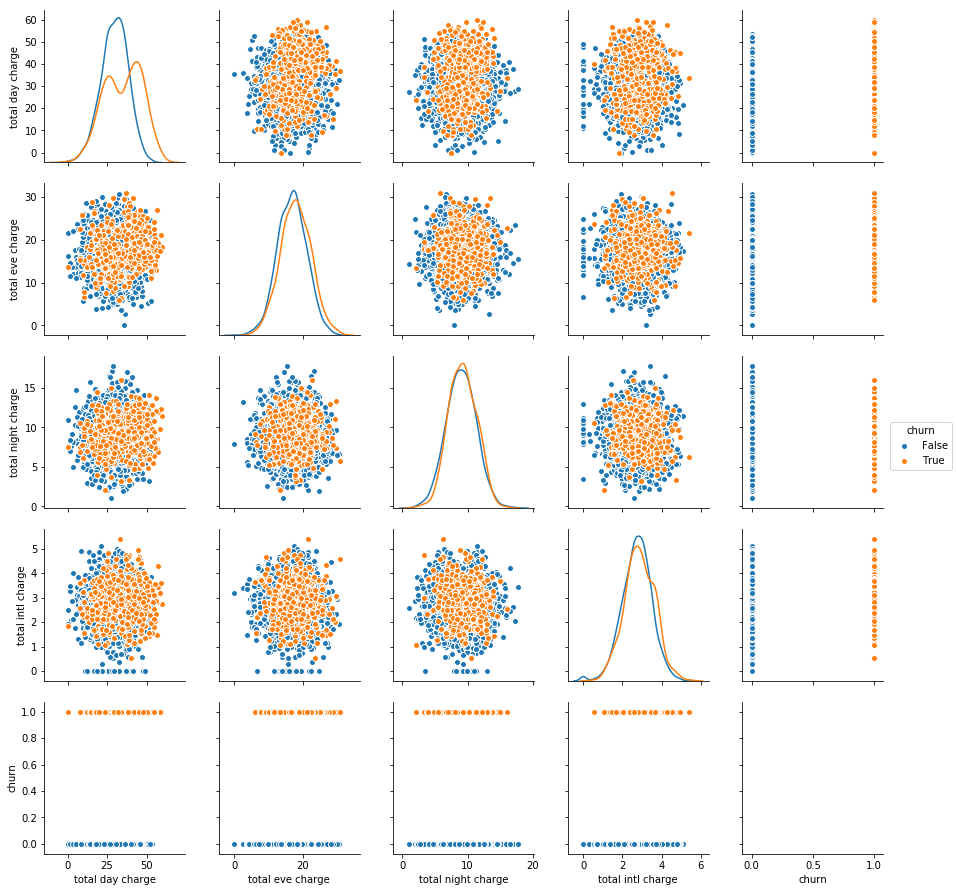

In [10]:
sns.pairplot(new_df, hue="churn", diag_kind = "kde");

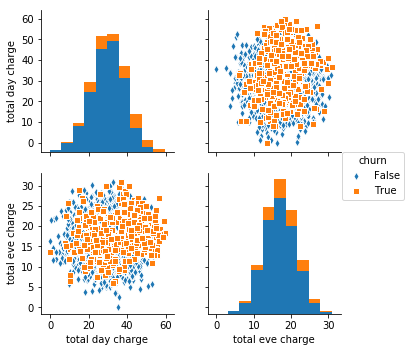

In [11]:
sns.pairplot(new_df, vars=["total day charge", "total eve charge"], 
             hue="churn", markers=["d", "s"]);

### Построение boxplot и violinplot 
 - на наборе данных, 
 - проанализировав числовой показатель 'total day minutes' в разрезе категориального

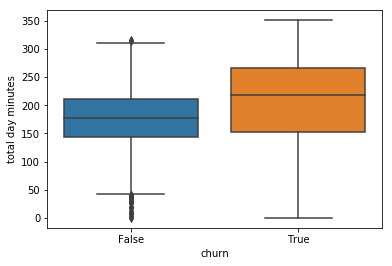

In [12]:
# построились два boxplot для лояльных и не лояльных клиентов
# средняя медиана выше в группе ушедших т.е. больше проговоривших
sns.boxplot(x='churn', y = 'total day minutes', data = df);

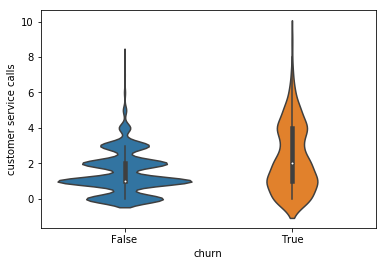

In [13]:
sns.violinplot(x='churn', y = 'customer service calls', data = df);

### Построение графика вида scatter используя pandas.DataFrame(Series.plot)

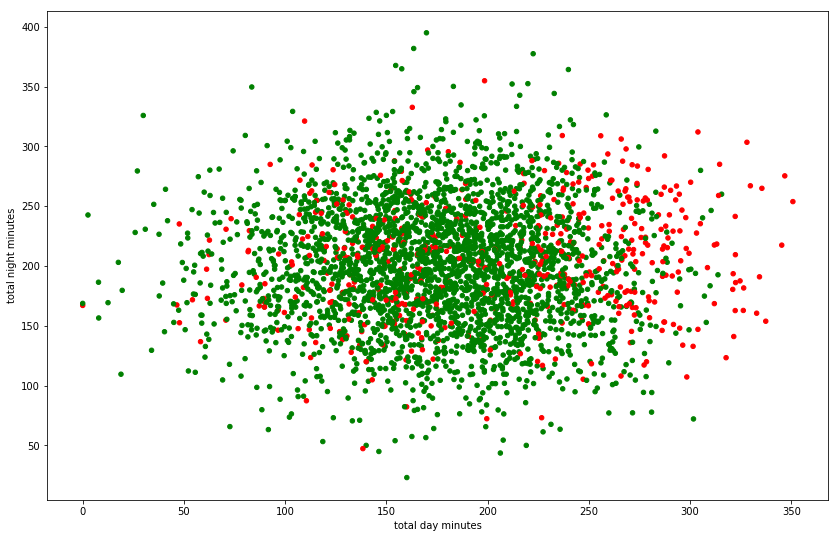

In [14]:
df.plot.scatter(x = 'total day minutes', y = 'total night minutes', 
                color=df['churn'].map({False: 'green', True: 'red'}), 
                figsize = (14, 9));

### Построение график вида Heatmap с помощью plotly

In [15]:
# !pip install plotly

In [16]:
import plotly
plotly.__version__

'3.4.0'

In [17]:
import plotly.graph_objs as go

plotly.offline.init_notebook_mode()

trace = go.Heatmap(
                   x=df['churn'],
                   y=df['state'], z=df['customer service calls'])
data=[trace]
plotly.offline.iplot(data)

**Клиент из штата Кентуки, после 6 обращений в сервисный центр, ушел от оператора**

**Количество звонков(обращений) в сервисный центр по регионам(штатам).
Среди ушедших клиентов('churn' = true) заметно больше.
Лояльные клиенты меньше обращались в сервисный центр.**